This notebook contains all the populaton level correlation analyses for Nurminen, Bijanzadeh & Angelucci 2022.

In [2]:
# Import packages, load pre-computed data and do pre-processing

import sys
import pickle as pkl
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns

sys.path.append('C:/Users/lonurmin/Desktop/code/DataAnalysis/')
import data_analysislib as dalib
from scipy.optimize import basinhopping

def cost_fano(params,xdata,ydata):
    Rhat = dalib.doubleROG(xdata,*params)
    err  = np.sum(np.power(Rhat - ydata,2))
    return err

def cost_response(params,xdata,ydata):
    Rhat = dalib.ROG(xdata,*params)
    err  = np.sum(np.power(Rhat - ydata,2))
    return err

F_dir   = 'C:/Users/lonurmin/Desktop/CorrelatedVariability/results/paper_v9/MK-MU/'
params_df = pd.read_csv(F_dir + 'extracted_correlation_params.csv')
corrBSL = np.nanmean(params_df['gm_fit_correlation_BSL'].values)
params_df['utype'] = ['multi'] * len(params_df.index)

paramsas = params_df

# correlations for all pairs
with open(F_dir + 'correlations_all.pkl','rb') as f:
    correlations_all = pkl.load(f)

with open(F_dir + 'means_all.pkl','rb') as f:
    means_all = pkl.load(f)    
    
diams_all  = np.array(list(correlations_all.keys()))
rSC_mn_all = np.zeros(diams_all.shape[0])
rSC_SE_all = np.zeros(diams_all.shape[0])
gm_mn_all  = np.zeros(diams_all.shape[0])
gm_SE_all  = np.zeros(diams_all.shape[0])

for d in range(diams_all.shape[0]):
    rSC_mn_all[d] = np.mean(correlations_all[diams_all[d]])
    rSC_SE_all[d] = np.std(correlations_all[diams_all[d]]) / np.sqrt(correlations_all[diams_all[d]].shape[0])

    gm_mn_all[d] = np.mean(means_all[diams_all[d]])
    gm_SE_all[d] = np.std(means_all[diams_all[d]]) / np.sqrt(means_all[diams_all[d]].shape[0])
    
    
# correlations for supragranular layer units
with open(F_dir + 'correlations_SGSG.pkl','rb') as f:
    correlations_SGSG = pkl.load(f)
with open(F_dir + 'means_SGSG.pkl','rb') as f:
    means_SGSG = pkl.load(f)
    
diams_SGSG  = np.array(list(correlations_SGSG.keys()))
rSC_mn_SGSG = np.zeros(diams_SGSG.shape[0])
rSC_SE_SGSG = np.zeros(diams_SGSG.shape[0])
gm_mn_SGSG = np.zeros(diams_SGSG.shape[0])
gm_SE_SGSG = np.zeros(diams_SGSG.shape[0])

for d in range(diams_SGSG.shape[0]):
    rSC_mn_SGSG[d] = np.mean(correlations_SGSG[diams_SGSG[d]])
    rSC_SE_SGSG[d] = np.std(correlations_SGSG[diams_SGSG[d]]) / np.sqrt(correlations_SGSG[diams_SGSG[d]].shape[0])

    gm_mn_SGSG[d] = np.mean(means_SGSG[diams_SGSG[d]])
    gm_SE_SGSG[d] = np.std(means_SGSG[diams_SGSG[d]]) / np.sqrt(means_SGSG[diams_SGSG[d]].shape[0])
    
# correlations for infragranular units
with open(F_dir + 'correlations_IGIG.pkl','rb') as f:
    correlations_IGIG = pkl.load(f)
# correlations for narrow spiking units
with open(F_dir + 'means_IGIG.pkl','rb') as f:
    means_IGIG = pkl.load(f)
    
diams_IGIG  = np.array(list(correlations_IGIG.keys()))
rSC_mn_IGIG = np.zeros(diams_IGIG.shape[0])
rSC_SE_IGIG = np.zeros(diams_IGIG.shape[0])
gm_mn_IGIG = np.zeros(diams_IGIG.shape[0])
gm_SE_IGIG = np.zeros(diams_IGIG.shape[0])
for d in range(diams_IGIG.shape[0]):
    rSC_mn_IGIG[d] = np.mean(correlations_IGIG[diams_IGIG[d]])
    rSC_SE_IGIG[d] = np.std(correlations_IGIG[diams_IGIG[d]]) / np.sqrt(correlations_IGIG[diams_IGIG[d]].shape[0])

    gm_mn_IGIG[d] = np.mean(means_IGIG[diams_IGIG[d]])
    gm_SE_IGIG[d] = np.std(means_IGIG[diams_IGIG[d]]) / np.sqrt(means_IGIG[diams_IGIG[d]].shape[0])

# correlations for granular units
with open(F_dir + 'correlations_GG.pkl','rb') as f:
    correlations_GG = pkl.load(f)
# correlations for narrow spiking units
with open(F_dir + 'means_GG.pkl','rb') as f:
    means_GG = pkl.load(f)
    
diams_GG  = np.array(list(correlations_GG.keys()))
rSC_mn_GG = np.zeros(diams_GG.shape[0])
rSC_SE_GG = np.zeros(diams_GG.shape[0])
gm_mn_GG = np.zeros(diams_GG.shape[0])
gm_SE_GG = np.zeros(diams_GG.shape[0])
for d in range(diams_GG.shape[0]):
    rSC_mn_GG[d] = np.mean(correlations_GG[diams_GG[d]])
    rSC_SE_GG[d] = np.std(correlations_GG[diams_GG[d]]) / np.sqrt(correlations_GG[diams_GG[d]].shape[0])

    gm_mn_GG[d] = np.mean(means_GG[diams_GG[d]])
    gm_SE_GG[d] = np.std(means_GG[diams_GG[d]]) / np.sqrt(means_GG[diams_GG[d]].shape[0])


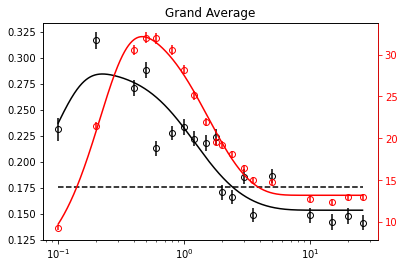

In [2]:
# plot the average correlation and mean firing rate for all units
plt.figure(num='Grand Average',frameon=False)
ax2 = plt.subplot(1,1,1)
ax2.title.set_text('Grand Average')
args = (diams_all,rSC_mn_all)
bnds = np.array([[0.0001,0.0001,0,0,0],[30,30,100,100,None]]).T
res  = basinhopping(cost_response,np.ones(5),minimizer_kwargs={'method': 'L-BFGS-B', 'args':args,'bounds':bnds},seed=1234)
popt = res.x
diams_tight = np.logspace(np.log10(diams_all[0]),np.log10(diams_all[-1]),1000)
Chat = dalib.ROG(diams_tight,*popt)
args = (diams_all,gm_mn_all)
bnds = np.array([[0.0001,0.0001,0,0,0],[30,30,100,100,None]]).T
res  = basinhopping(cost_response,np.ones(5),minimizer_kwargs={'method': 'L-BFGS-B', 'args':args,'bounds':bnds},seed=1234)
popt = res.x
diams_tight = np.logspace(np.log10(diams_all[0]),np.log10(diams_all[-1]),1000)
Rhat = dalib.ROG(diams_tight,*popt)

corrBSL_all = params_df['gm_fit_correlation_BSL'].mean()
ax2b = ax2.twinx()
ax2.errorbar(diams_all, rSC_mn_all, yerr=rSC_SE_all, fmt='ko', markerfacecolor='None')
ax2b.errorbar(diams_all, gm_mn_all, yerr=gm_SE_all, fmt='ro', markerfacecolor='None')
ax2.plot(diams_tight,Chat, 'k-')
ax2b.plot(diams_tight,Rhat, 'r-')
ax2.plot([diams_all[0], diams_all[-1]], [corrBSL_all, corrBSL_all], 'k--')
ax2.set_xscale('log')
#ax2.set_yticks([0, 0.15, 0.3, 0.45])
ax2.set_xticks([0.1, 1, 10])
ax2b.spines['right'].set_color('red')
ax2b.tick_params(axis='y',colors='red')
ax2b.yaxis.label.set_color('red')

The figure above plot the average correlation and firing-rate for all the 82 multi-units we recorded for this study. Black symbols show correlations and red symbols show firing-rate. The smooth curvers show a function fitted to the data. The dashed line represents baseline correlation.

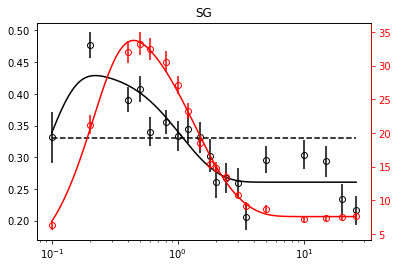

In [3]:
# plot the average correlation and mean firing rate for supragranular units
plt.figure(num='SG')
ax2 = plt.subplot(1,1,1)
ax2.title.set_text('SG')
args = (diams_SGSG,rSC_mn_SGSG)
bnds = np.array([[0.0001,0.0001,0,0,0],[30,30,100,100,None]]).T
res  = basinhopping(cost_response,np.ones(5),minimizer_kwargs={'method': 'L-BFGS-B', 'args':args,'bounds':bnds},seed=1234)
popt = res.x
diams_tight = np.logspace(np.log10(diams_SGSG[0]),np.log10(diams_SGSG[-1]),1000)
Chat = dalib.ROG(diams_tight,*popt)

args = (diams_SGSG,gm_mn_SGSG)
bnds = np.array([[0.0001,0.0001,0,0,0],[30,30,100,100,None]]).T
res  = basinhopping(cost_response,np.ones(5),minimizer_kwargs={'method': 'L-BFGS-B', 'args':args,'bounds':bnds},seed=1234)
popt = res.x
diams_tight = np.logspace(np.log10(diams_SGSG[0]),np.log10(diams_SGSG[-1]),1000)
Rhat = dalib.ROG(diams_tight,*popt)

corrBSL_SGSG = params_df.groupby('layer_type')['gm_fit_correlation_BSL'].mean()['SGSG']
ax2b = ax2.twinx()
ax2.errorbar(diams_SGSG, rSC_mn_SGSG, yerr=rSC_SE_SGSG, fmt='ko', markerfacecolor='None')
ax2b.errorbar(diams_SGSG, gm_mn_SGSG, yerr=gm_SE_SGSG, fmt='ro', markerfacecolor='None')
ax2.plot(diams_tight,Chat, 'k-')
ax2b.plot(diams_tight,Rhat, 'r-')
ax2.plot([diams_SGSG[0], diams_SGSG[-1]], [corrBSL_SGSG, corrBSL_SGSG], 'k--')
ax2.set_xscale('log')
#ax2.set_yticks([0, 0.15, 0.3, 0.45])
ax2.set_xticks([0.1, 1, 10])
ax2b.spines['right'].set_color('red')
ax2b.tick_params(axis='y',colors='red')
ax2b.yaxis.label.set_color('red')

The figure above plot the average correlation and firing-rate for multi-units in supragranular layers of V1. Figure conventions as above.

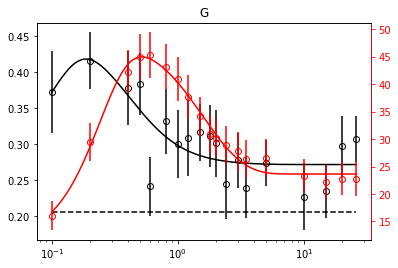

In [4]:
# plot the average correlation and mean firing rate for granular layer units
plt.figure(num='G')
corrBSL_GG = params_df.groupby('layer_type')['gm_fit_correlation_BSL'].mean()['GG']
ax4 = plt.subplot(1,1,1)
ax4.title.set_text('G')
ax4b = ax4.twinx()
args = (diams_GG,rSC_mn_GG)
bnds = np.array([[0.0001,0.0001,0,0,0],[30,30,100,100,None]]).T
res  = basinhopping(cost_response,np.ones(5),minimizer_kwargs={'method': 'L-BFGS-B', 'args':args,'bounds':bnds},seed=1234)
popt = res.x
diams_tight = np.logspace(np.log10(diams_GG[0]),np.log10(diams_GG[-1]),1000)
Chat = dalib.ROG(diams_tight,*popt)

args = (diams_GG,gm_mn_GG)
bnds = np.array([[0.0001,0.0001,0,0,0],[30,30,100,100,None]]).T
res  = basinhopping(cost_response,np.ones(5),minimizer_kwargs={'method': 'L-BFGS-B', 'args':args,'bounds':bnds},seed=1234)
popt = res.x
diams_tight = np.logspace(np.log10(diams_GG[0]),np.log10(diams_GG[-1]),1000)
Rhat = dalib.ROG(diams_tight,*popt)

ax4.errorbar(diams_GG, rSC_mn_GG, yerr=rSC_SE_GG, fmt='ko', markerfacecolor='None')
ax4b.errorbar(diams_GG, gm_mn_GG, yerr=gm_SE_GG, fmt='ro', markerfacecolor='None')
ax4.plot(diams_tight,Chat, 'k-')
ax4b.plot(diams_tight,Rhat, 'r-')
ax4.plot([diams_GG[0], diams_GG[-1]], [corrBSL_GG, corrBSL_GG], 'k--')
ax4.set_xscale('log')
#ax4.set_yticks([0, 0.15, 0.3, 0.45])
ax4.set_xticks([0.1, 1, 10])
ax4b.spines['right'].set_color('red')
ax4b.tick_params(axis='y',colors='red')
ax4b.yaxis.label.set_color('red')

The figure above plot the average correlation and firing-rate for multi-units in granular layers of V1. Figure conventions as above.